In [146]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
concrete=pd.read_excel('Concrete_Data.xls')
concrete = concrete.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [10]:

X = concrete.drop('compressive_strength', axis=1)



y = concrete[['compressive_strength']]

In [11]:
from sklearn.model_selection import train_test_split

In [37]:
X_sample, X_test, y_sample, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, test_size=0.30, random_state=1)

In [38]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_validate,y_validate))

0.9999530904603317
0.7439868789833455


In [126]:
 print(pd.DataFrame(model.feature_importances_,columns=['importance'],index=X_train.columns))

              importance
cement          0.350474
furnace_slag    0.086626
water           0.147023
coarse_agg      0.044379
age             0.371498


# removing the low importance variables

In [129]:
X = concrete.drop(['compressive_strength','fly_ash','fine_agg','super_plasticizer'], axis=1)



y = concrete[['compressive_strength']]

In [130]:
X_sample, X_test, y_sample, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, test_size=0.30, random_state=1)

In [131]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_validate,y_validate))

0.9986690776066909
0.7942555555720281


# Bagging-random forest-boosting

In [132]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [156]:
rfr=RandomForestRegressor(n_estimators=50)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_validate,y_validate))

0.9826440255258263
0.8683215828864552


In [157]:
gbr=GradientBoostingRegressor(n_estimators=50)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_validate,y_validate))

0.9258817705112734
0.8410772607846456


In [158]:
bgr=BaggingRegressor(n_estimators=50)
bgr.fit(X_train, y_train)
print(bgr.score(X_train, y_train))
print(bgr.score(X_validate,y_validate))

0.9830062250992202
0.8691362089678017


# finding 95% confidence interval

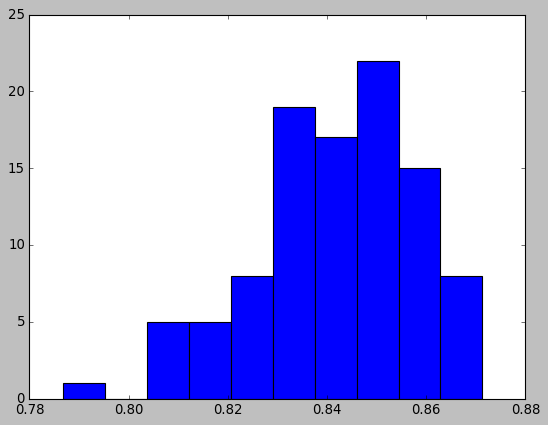

95.0 confidence interval 80.7% and 86.9%


In [162]:
# configure bootstrap
n_iterations = 100             # Number of bootstrap samples to create
n_size = int(len(concrete) * 0.50)    # picking only 50 % of the given data in every bootstrap sample
values =concrete.values
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = RandomForestRegressor()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score=metrics.r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	stats.append(score)
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

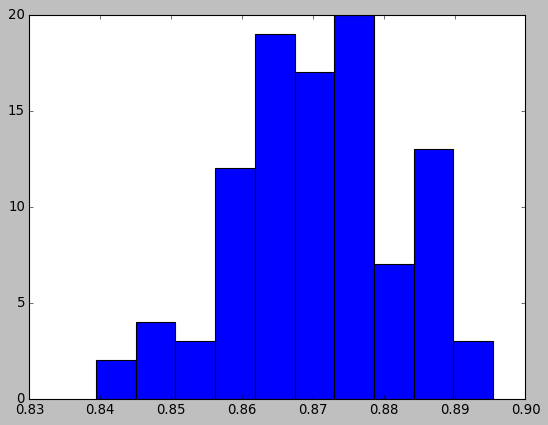

95.0 confidence interval 84.7% and 89.0%


In [163]:
# configure bootstrap
n_iterations = 100             # Number of bootstrap samples to create
n_size = int(len(concrete) * 0.50)    # picking only 50 % of the given data in every bootstrap sample
values =concrete.values
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = GradientBoostingRegressor()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score=metrics.r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	stats.append(score)
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

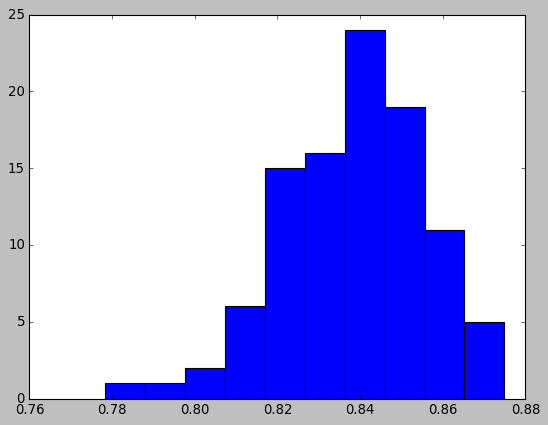

95.0 confidence interval 80.3% and 87.1%


In [164]:
# configure bootstrap
n_iterations = 100             # Number of bootstrap samples to create
n_size = int(len(concrete) * 0.50)    # picking only 50 % of the given data in every bootstrap sample
values =concrete.values
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = BaggingRegressor()
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	predictions = model.predict(test[:,:-1])
	score=metrics.r2_score(test[:,-1], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
	stats.append(score)
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# getting optimal hyper parameters

In [160]:
# specify parameters and distributions to sample from
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              }
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=samples) #default cv = 3
randomCV.fit(X, y)
print(randomCV.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7}
